<a href="https://colab.research.google.com/github/mpiatek26/Fashion_Class_Classification/blob/main/Fashion_Class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [371]:
# import libraries
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random


In [372]:
# dataframes creation for both training and testing datasets
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [373]:
# Let's view the head of the training dataset
# 784 indicates 28x28 pixels and 1 coloumn for the label
# After you check the tail, 60,000 training dataset are present
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [374]:
# Let's view the last elements in the training dataset
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [375]:
# Let's view the head of the testing dataset
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [376]:
# Let's view the last elements in the testing dataset
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [377]:
fashion_train_df.shape

(60000, 785)

In [378]:
# Create training and testing arrays
training = fashion_train_df.to_numpy()
testing = fashion_test_df.to_numpy()

In [379]:
training.shape

(60000, 785)

In [380]:
training

array([[2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]])

In [381]:
testing.shape

(10000, 785)

In [382]:
testing

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 1, 0],
       [8, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

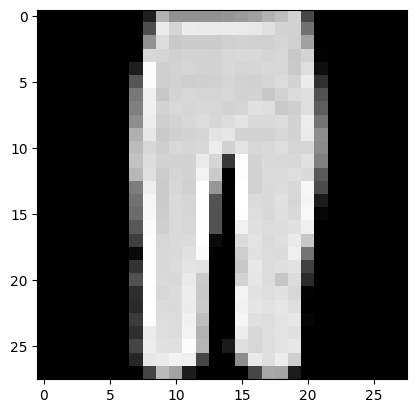

In [383]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image

plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image


# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

In [384]:
label = training[i,0]
label

1

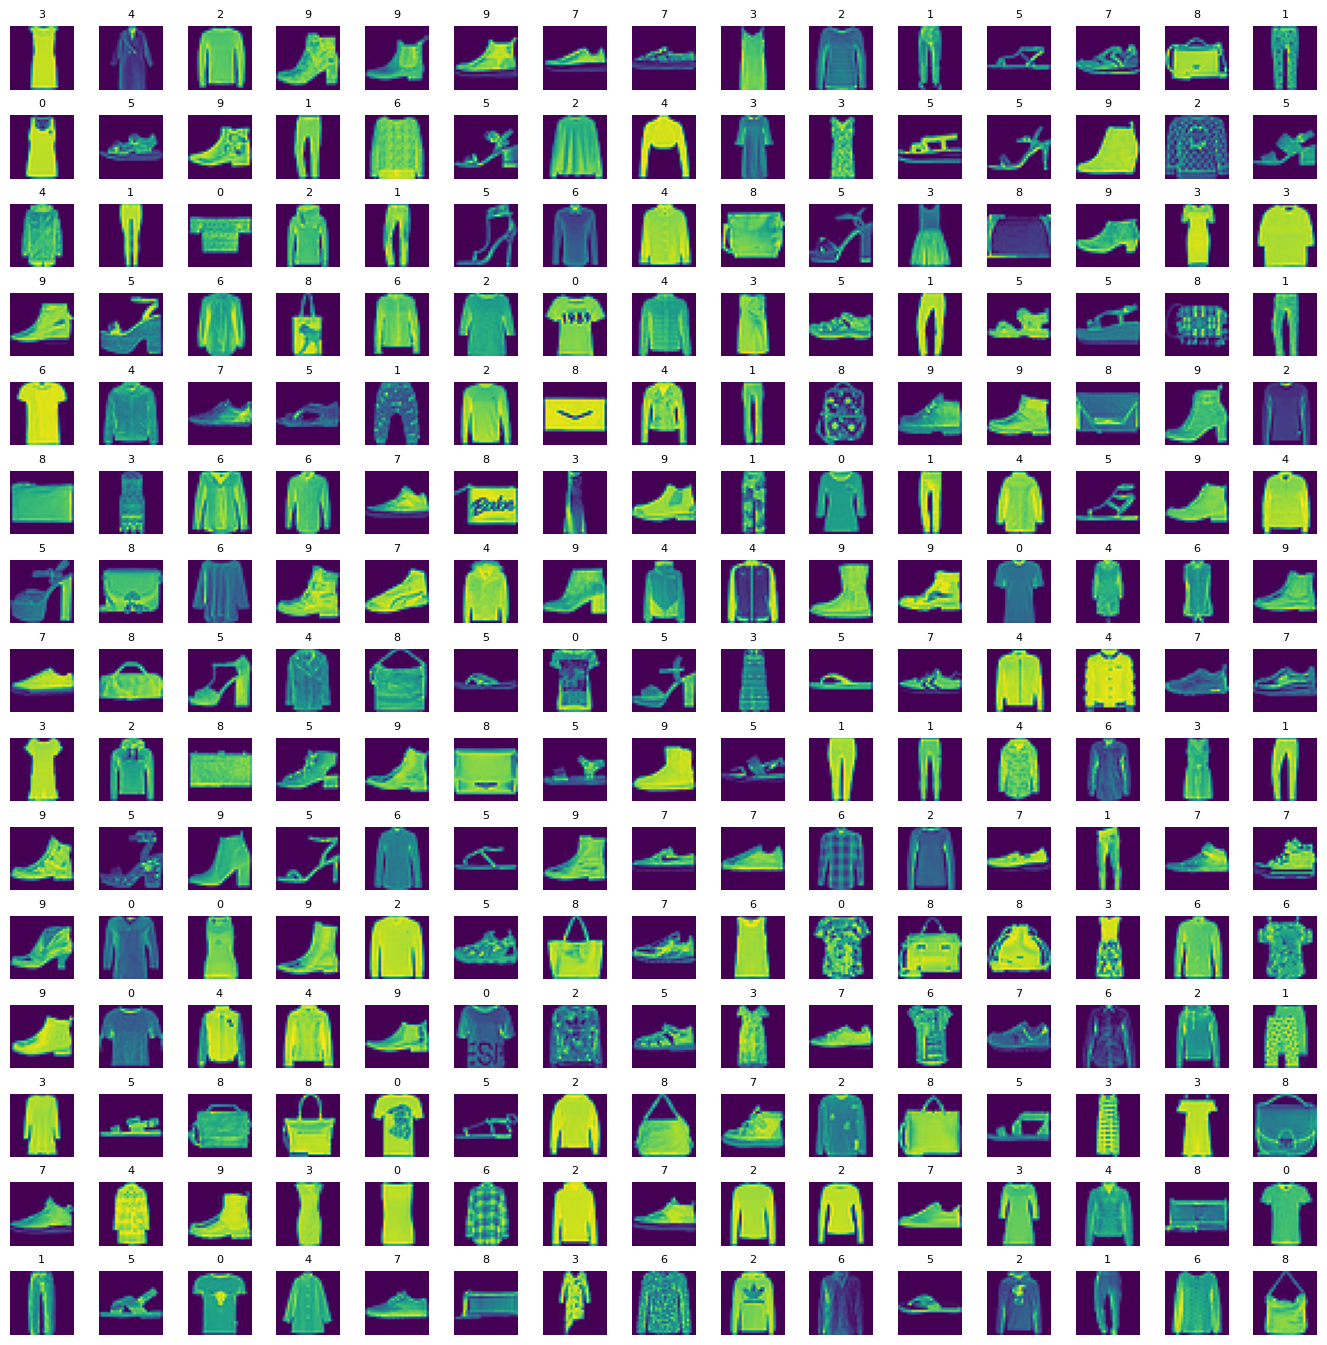

In [385]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot


In [386]:
# Prepare the training and testing dataset
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [387]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)


In [388]:
print(X_train.shape)
print(X_validate.shape)
print(y_train.shape)
print(y_validate.shape)


(48000, 784)
(12000, 784)
(48000,)
(12000,)


In [389]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_validate = X_validate.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [390]:
import keras # open source Neural network library madke our life much easier

y_train = keras.utils.to_categorical(y_train, 10)
y_validate = keras.utils.to_categorical(y_validate, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [391]:
print(X_train.shape)
print(X_validate.shape)
print(y_train.shape)
print(y_validate.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(48000, 10)
(12000, 10)


In [392]:
# Import train_test_split from scikit library
# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [393]:
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=32, activation='relu'))
cnn_model.add(Dense(units=10, activation='softmax'))

In [394]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [395]:
epochs = 25

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        epochs = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

Epoch 1/25
94/94 [==============================] - 61s 641ms/step - loss: 1.0486 - accuracy: 0.6377 - val_loss: 0.6155 - val_accuracy: 0.7648
Epoch 2/25
94/94 [==============================] - 60s 630ms/step - loss: 0.5613 - accuracy: 0.7894 - val_loss: 0.5040 - val_accuracy: 0.8175
Epoch 3/25
94/94 [==============================] - 62s 659ms/step - loss: 0.4767 - accuracy: 0.8283 - val_loss: 0.4338 - val_accuracy: 0.8479
Epoch 4/25
94/94 [==============================] - 61s 649ms/step - loss: 0.4405 - accuracy: 0.8428 - val_loss: 0.4021 - val_accuracy: 0.8614
Epoch 5/25
94/94 [==============================] - 63s 665ms/step - loss: 0.4049 - accuracy: 0.8564 - val_loss: 0.3834 - val_accuracy: 0.8658
Epoch 6/25
94/94 [==============================] - 62s 656ms/step - loss: 0.3900 - accuracy: 0.8604 - val_loss: 0.3666 - val_accuracy: 0.8705
Epoch 7/25
94/94 [==============================] - 61s 649ms/step - loss: 0.3683 - accuracy: 0.8705 - val_loss: 0.3586 - val_accuracy: 0.8740

In [396]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 4s 13ms/step - loss: 0.2666 - accuracy: 0.9055
Test Accuracy : 0.905


In [397]:
# get the predictions for the test data
predicted_probabilities = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=-1)


313/313 [==============================] - 3s 9ms/step


In [398]:
print(predicted_classes.shape)
print(y_test.shape)


(10000,)
(10000, 10)


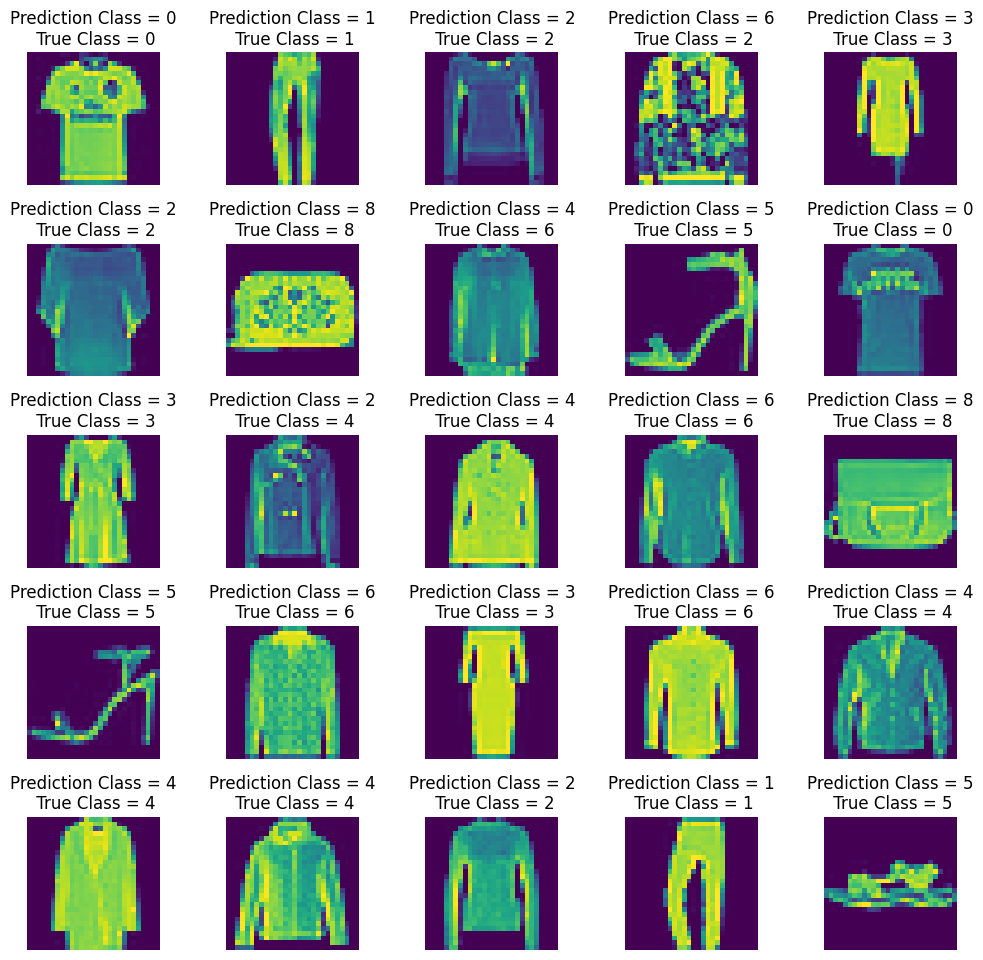

In [399]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28, 28))
    axes[i].set_title("Prediction Class = {:d}\n True Class = {:d}".format(predicted_classes[i], np.argmax(y_test[i])))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

<Axes: >

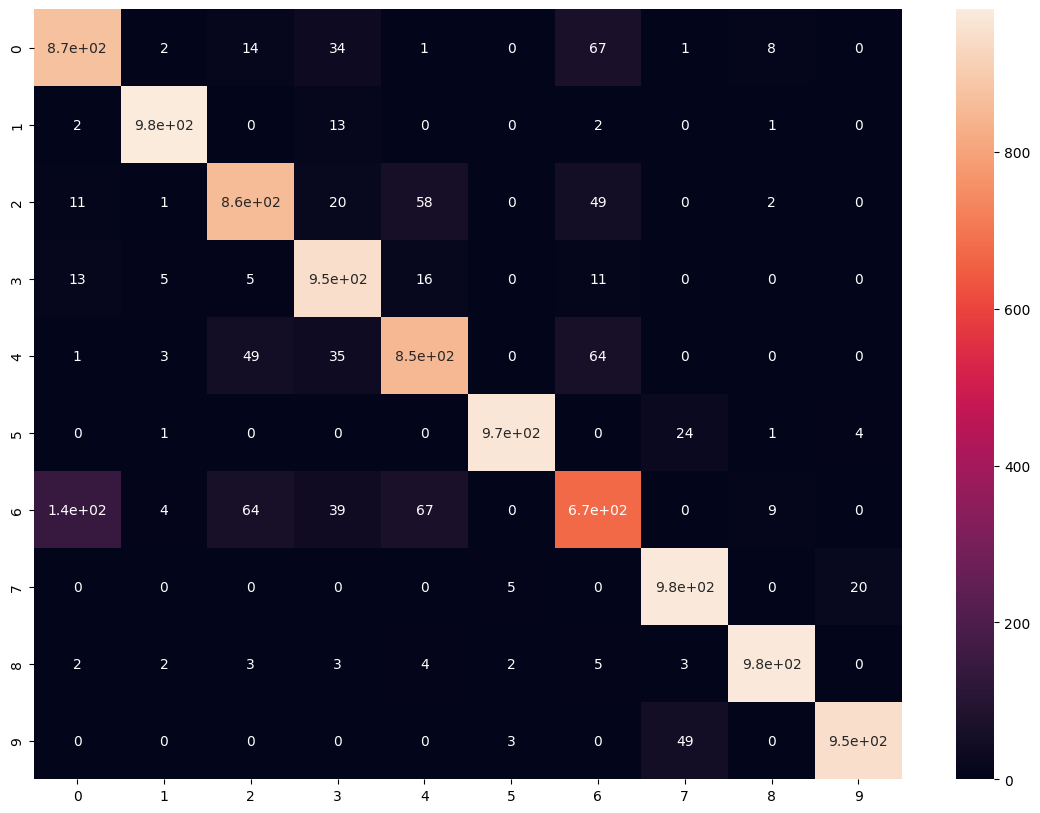

In [400]:
from sklearn.metrics import confusion_matrix
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [401]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, predicted_classes, target_names=target_names))


              precision    recall  f1-score   support

     Class 0       0.84      0.87      0.85      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.86      0.86      0.86      1000
     Class 3       0.87      0.95      0.91      1000
     Class 4       0.85      0.85      0.85      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.77      0.67      0.72      1000
     Class 7       0.93      0.97      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.90      0.91      0.90     10000
weighted avg       0.90      0.91      0.90     10000

